# Мечи залива работорговцев

После оглушительного успеха в освобождении Астапора, Миэрина и Юнкая от власти
работорговцев Дейенерис Бурерожденная открыла себе доступ к Летнему морю, а
следовательно путь в Вестерос.

Для ведения войны с Семью Королевствами нужно оружие, а для оружия нужна сталь.
Нет никаких сомнений в кузнечном искусстве Безупречных, однако поставщики стали не
столь надежны.

Два основных поставщика стали это **Westeros Inc.** и **Harpy & Co.**
На протяжении нескольких месяцев мы закупаем сталь у обеих компаний, и каждая из них
предлагает ощутимую скидку при заключении эксклюзивного договора на поставку.
Советник королевы Тирион Ланнистер знает о твоем умении принимать взвешенные
рациональные решения и просит помощи в объективном решении вопроса о том, с какой из
компаний следует заключить эксклюзивный договор на поставку стали.
У Тириона есть записи о производстве мечей каждым из кузнецов-безупречных, а также
данные о количестве сломанных мечей в каждый из месяцев ведения боевых действий.

#### Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

### Загрузка данных

Данные считываем из CSV-файла. Выводим структуру DataFrame (первых 5 строчек).

In [2]:
df = pd.read_csv('production-data.csv')

df.head()

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1.0,1,1,103.0,0.0,harpy.co
1,1.0,1,2,0.0,2.0,harpy.co
2,1.0,1,3,0.0,4.0,harpy.co
3,1.0,1,4,0.0,5.0,harpy.co
4,1.0,1,5,0.0,13.0,harpy.co


### Ежемесячное сравнение объёмов производства мечей по поставщикам

Подготовим и визуализируем данные о количестве произведённых мечей по каждому поставщику (**Westeros Inc.** и **Harpy & Co.**) за каждый месяц. Сначала из исходного DataFrame сформируем новый столбец **month**. Затем данные сгруппируем по двум параметрам — номеру месяца и названию поставщика — с суммированием показателя **produced**. После преобразования **unstack** результат превращается в таблицу, где каждая колонка соответствует отдельному поставщику, а строки — месяцам. Далее строим график производства для каждого поставщика. 

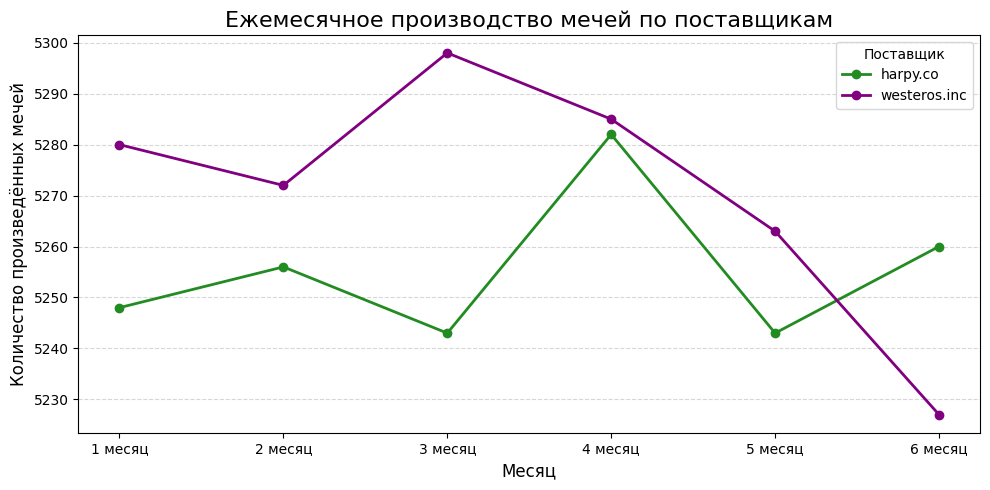

In [3]:
df['month'] = df['production.date'].astype(int)

monthly_prod = (
    df
    .groupby(['month', 'supplier'])['produced']
    .sum()
    .unstack('supplier')      
    .sort_index()             
)

fig = plt.figure(figsize=(10, 5))
monthly_prod.plot(
    kind='line',
    marker='o',
    linewidth=2,
    color=['forestgreen', 'purple'],
    ax=fig.gca()
)

plt.title('Ежемесячное производство мечей по поставщикам', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество произведённых мечей', fontsize=12)
plt.xticks(
    ticks=monthly_prod.index,
    labels=[f'{m} месяц' for m in monthly_prod.index],
    rotation=0
)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Поставщик')
plt.tight_layout()

plt.show()

In [4]:
display(monthly_prod)

supplier,harpy.co,westeros.inc
month,,
1,5248.0,5280.0
2,5256.0,5272.0
3,5243.0,5298.0
4,5282.0,5285.0
5,5243.0,5263.0
6,5260.0,5227.0


### Среднее количество дефектов в зависимости от времени между производством и отчётом

Чтобы посчитать среднее количество дефектов, добавим в DataFrame новый столбец **duration**, который показывает, сколько месяцев прошло от даты изготовления меча до даты его учёта. Далее сгруппируем данные по этому времени и по каждому из двух поставщиков, чтобы для каждой «промежуточной» длительности посчитать среднее количество бракованных изделий. С помощью метода **.unstack()** преобразуем результат в таблицу, где строки — это длительность в месяцах, а колонки — поставщики. Затем строим график. По графику можно оценить, не растёт ли количество дефектов с увеличением периода хранения или транспортировки, что важно при выборе надёжного поставщика.

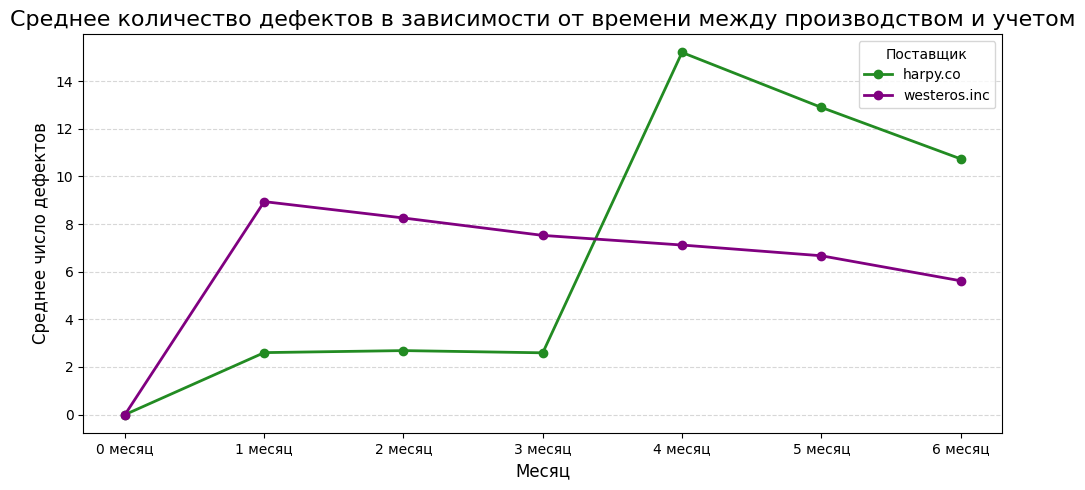

In [5]:
df['duration'] = df['report.date'] - df['production.date']

duration_mean = (
    df
    .groupby(['duration', 'supplier'])['defects']
    .mean()
    .unstack('supplier')     
    .sort_index()           
)

fig = plt.figure(figsize=(10, 5))
duration_mean.plot(
    kind='line',
    marker='o',
    linewidth=2,
    color=['forestgreen', 'purple'],
    ax=fig.gca()
)

plt.title('Среднее количество дефектов в зависимости от времени между производством и учетом', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Среднее число дефектов', fontsize=12)
plt.xticks(
    ticks=duration_mean.index,
    labels=[f'{d} месяц' for d in duration_mean.index],
    rotation=0
)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Поставщик')
plt.tight_layout()
plt.show()

### Анализ дефектов

Добавим в таблицу столбец **report_month** — номер месяца, когда ковали мечи. Затем сгруппируем данные по этому месяцу и по каждому поставщику, суммируя количество дефектных изделий. После этого строим график, где каждая точка показывает число дефектных мечей у Harpy & Co и Westeros Inc. за соответствующий отчётный месяц.

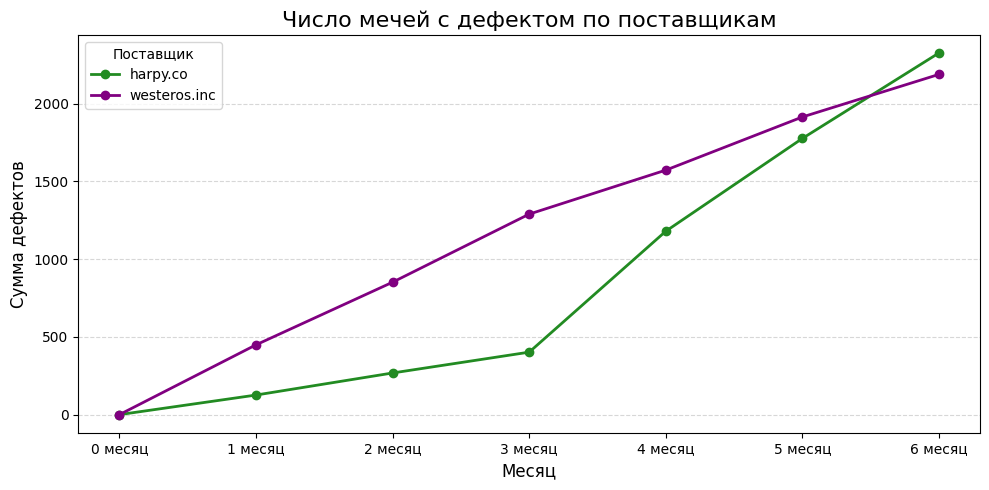

In [6]:
df['report_month'] = df['report.date'].astype(int)

monthly_defects = (
    df
    .groupby(['report_month', 'supplier'])['defects']
    .sum()
    .unstack('supplier')
    .sort_index()
)

monthly_defects.index = monthly_defects.index - 1

fig = plt.figure(figsize=(10, 5))
monthly_defects.plot(
    kind='line',
    marker='o',
    linewidth=2,
    color=['forestgreen', 'purple'],
    ax=fig.gca()
)

plt.title('Число мечей с дефектом по поставщикам', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Cумма дефектов', fontsize=12)
plt.xticks(
    ticks=monthly_defects.index,
    labels=[f'{m} месяц' for m in monthly_defects.index],
    rotation=0
)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Поставщик')
plt.tight_layout()
plt.show()

### Накопительный объём исправных мечей по поставщикам

Сначала сгруппируем данные по месяцу производства и поставщику, чтобы получить суммарное число изготовленных и суммарное число бракованных мечей. Затем вычитаем дефекты из общего производства — получаем количество исправных мечей за каждый месяц. После этого применяем кумулятивную сумму **(.cumsum())**, чтобы отобразить нарастающий итог исправных мечей с начала периода. Строим график, где каждая точка показывает общее число исправных мечей, поставленных **Harpy & Co** и **Westeros Inc.** к соответствующему месяцу. 

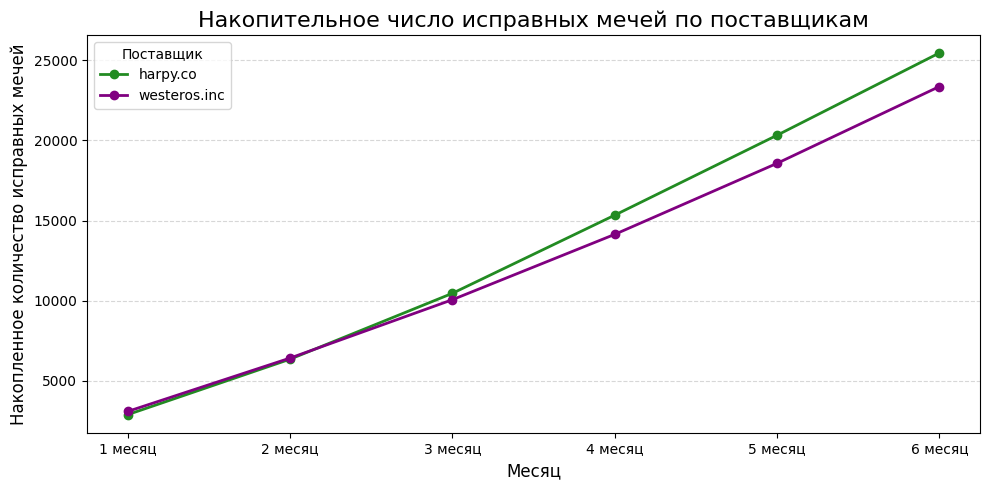

In [7]:
df['month'] = df['production.date'].astype(int)

monthly_prod = df.groupby(['month','supplier'])['produced'].sum().unstack('supplier').sort_index()
monthly_defects = df.groupby(['month','supplier'])['defects'].sum().unstack('supplier').sort_index()

monthly_normal = monthly_prod - monthly_defects
monthly_normal_cum = monthly_normal.cumsum()

fig = plt.figure(figsize=(10, 5))
monthly_normal_cum.plot(
    kind='line',
    marker='o',
    linewidth=2,
    color=['forestgreen', 'purple'],
    ax=fig.gca()
)

plt.title('Накопительное число исправных мечей по поставщикам', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Накопленное количество исправных мечей', fontsize=12)
plt.xticks(
    ticks=monthly_normal_cum.index,
    labels=[f'{m} месяц' for m in monthly_normal_cum.index],
    rotation=0
)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Поставщик')
plt.tight_layout()
plt.show()